In [1]:


import os
from os.path import exists, join, basename

project_name = "Mask_RCNN"
if not exists(project_name):
  # clone and install
  !git clone -q https://github.com/matterport/Mask_RCNN.git
  !cd $project_name && pip install -q -r requirements.txt
  !pip uninstall -y tensorflow keras
  !pip install -q keras==2.1.6 tensorflow==1.15.0 h5py==2.10.0
  
import sys
sys.path.append(project_name)

In [2]:
#@title
import random
import math
import time
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False

# Root directory of the project
ROOT_DIR = os.path.abspath(project_name)

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)
    
    
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()


# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

C:\Users\pc\anaconda3\envs\zaykada7yka\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pc\anaconda3\envs\zaykada7yka\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pc\anaconda3\envs\zaykada7yka\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pc\anaconda3\envs\zaykada7yka\lib\site-packages\tensorf






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


MASKED RCNN FUNCTION 


In [3]:
car_count =0
truck_count =0
bus_count =0
motorcycle_count =0
person_count=0

import cv2
import threading
def RCNN(X): 
    vidcap = cv2.VideoCapture(X)
    success,image = vidcap.read()
    count = 0

    print(image)
    while success:
      cv2.imwrite(r"C:\Users\pc\masked_RCNN\frame%d.jpg" % count, image)     # save frame as JPEG file      
      success,image = vidcap.read()
      
    print('Read a new frame: ', success)
    
    count += 1
    print(count)
    for i in range (count):
        if(i%10==0):
            IMAGE_URL = 'frame'+str(i)+'.jpg'

            image_file = basename(IMAGE_URL)

            image = skimage.io.imread(image_file)
            plt.figure(figsize=(15, 10))
            plt.imshow(image)
            t = time.time()
            # Run detection
            results = model.detect([image], verbose=1)
            
            print("executed in %.3fs" % (time.time() - t))

            # Visualize results
            r = results[0]
            car_count =0
            truck_count =0
            bus_count =0
            motorcycle_count =0
            person_count=0

            for j in r['class_ids']:

                if(j==3):
                    car_count+=1
                elif(j==8):
                    truck_count+=1
                elif(j==6):    
                    bus_count+=1
                elif(j==4):
                    motorcycle_count+=1
                elif(j==1):
                    person_count+=1    

            print("car :"+str(car_count))
            print("bus :"+str(bus_count))
            print("truck :"+str(truck_count))
            print("motorcycle :"+str(motorcycle_count))
            print("person :"+str(person_count))

           
            visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                class_names, r['scores'])

            return car_count , truck_count ,bus_count, motorcycle_count , person_count





# Algorithm for Traffic  BY MASKED RCNN



In [4]:



import time





#range for the green light 
default_green_min = 10 
default_green_max = 60 


#weights for every vechile type 
CarTime = 2 
BikeTime = 1 
BusTime = 2.5 
TruckTime = 2.5 


















       
 

                      
                       


~~~~~~~~first lane turn !!!~~~~~~~~~~~
[[[ 27  31  37]
  [ 29  33  39]
  [ 35  31  32]
  ...
  [125 124 126]
  [125 124 126]
  [123 124 126]]

 [[ 27  31  37]
  [ 29  33  39]
  [ 35  31  32]
  ...
  [125 124 126]
  [125 124 126]
  [123 124 126]]

 [[ 27  31  37]
  [ 29  33  39]
  [ 35  31  32]
  ...
  [125 124 126]
  [125 124 126]
  [123 124 126]]

 ...

 [[ 36  33  30]
  [ 37  34  31]
  [ 32  34  34]
  ...
  [ 48 112 148]
  [ 47 111 147]
  [ 47 111 147]]

 [[ 36  33  30]
  [ 37  34  31]
  [ 32  34  34]
  ...
  [ 47 112 145]
  [ 47 112 145]
  [ 48 113 146]]

 [[ 36  33  30]
  [ 37  34  31]
  [ 32  34  34]
  ...
  [ 45 110 143]
  [ 45 110 143]
  [ 47 112 145]]]
Read a new frame:  False
1
Processing 1 images
image                    shape: (648, 459, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float6

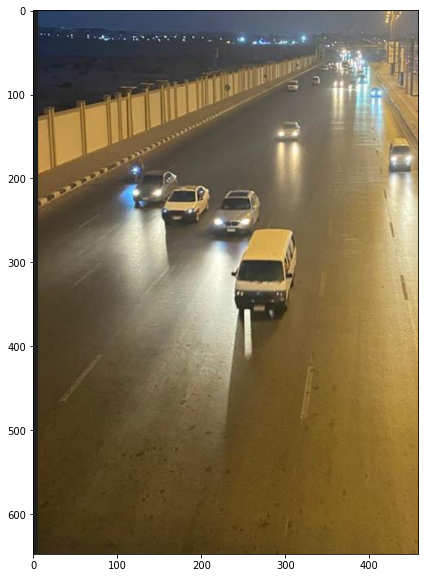

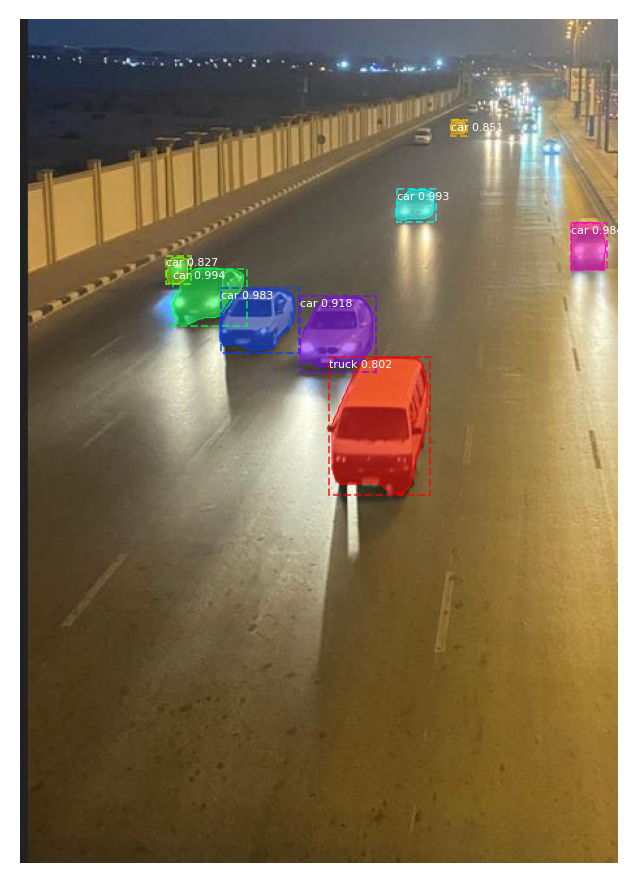

green time for the other lane is : 17
17 17
Green Traffic : 00:17
Red Traffic : 00:17
Green Traffic : 00:16
Red Traffic : 00:16
Green Traffic : 00:15
Red Traffic : 00:15
Green Traffic : 00:14
Red Traffic : 00:14
Green Traffic : 00:13
Red Traffic : 00:13
Green Traffic : 00:12
Red Traffic : 00:12
Green Traffic : 00:11
Red Traffic : 00:11
Green Traffic : 00:10
Red Traffic : 00:10
Green Traffic : 00:09
Red Traffic : 00:09
Green Traffic : 00:08
Red Traffic : 00:08
Green Traffic : 00:07
Red Traffic : 00:07
Green Traffic : 00:06
Red Traffic : 00:06
Green Traffic : 00:05
Red Traffic : 00:05
Green Traffic : 00:04
Red Traffic : 00:04
Green Traffic : 00:03
Red Traffic : 00:03
Green Traffic : 00:02
Red Traffic : 00:02
Green Traffic : 00:01
Red Traffic : 00:01
~~~~~~~~Second lane turn !!!~~~~~~~~~~~
[[[ 36  77 109]
  [ 36  77 109]
  [ 37  78 110]
  ...
  [ 57 144 204]
  [ 57 144 204]
  [ 59 145 208]]

 [[ 37  78 110]
  [ 37  78 110]
  [ 38  79 111]
  ...
  [ 57 144 204]
  [ 57 144 204]
  [ 59 145 2

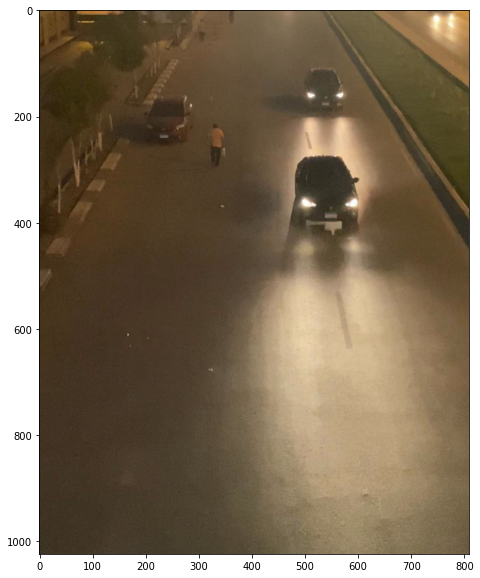

Yellow Traffic : 00:01


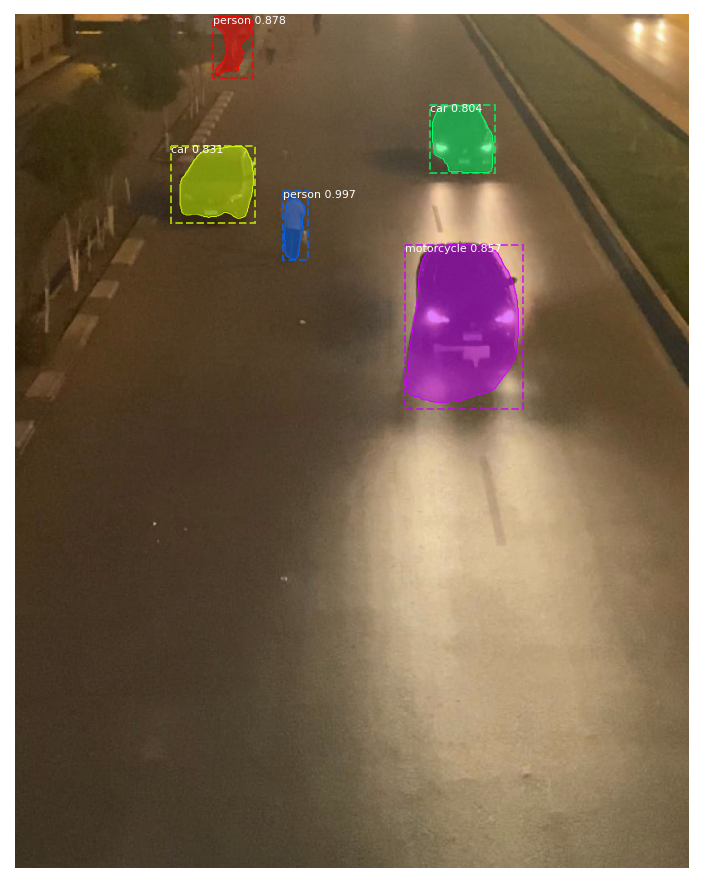

green time for the other lane is : 5
10 10
Green Traffic :Red Traffic : 00:10
 00:10
Green Traffic : 00:09
Red Traffic : 00:09
Green Traffic : 00:08
Red Traffic : 00:08
Green Traffic : 00:07
Red Traffic : 00:07
Green Traffic : 00:06
Red Traffic : 00:06
Green Traffic : 00:05
Red Traffic : 00:05
Green Traffic : 00:04
Red Traffic : 00:04
Green Traffic : 00:03
Red Traffic : 00:03
Green Traffic : 00:02
Red Traffic : 00:02
Green Traffic : 00:01
Red Traffic : 00:01
~~~~~~~~first lane turn !!!~~~~~~~~~~~
[[[ 80  62  49]
  [ 81  63  50]
  [ 81  62  52]
  ...
  [123 145 168]
  [124 146 169]
  [122 146 170]]

 [[ 81  63  50]
  [ 81  63  50]
  [ 82  63  53]
  ...
  [132 154 177]
  [132 154 177]
  [131 155 179]]

 [[ 82  64  51]
  [ 83  65  52]
  [ 83  64  54]
  ...
  [134 156 179]
  [134 156 179]
  [133 157 181]]

 ...

 [[ 49  88 106]
  [ 49  88 106]
  [ 49  88 106]
  ...
  [ 45 105 139]
  [ 44 104 138]
  [ 45 106 143]]

 [[ 50  88 109]
  [ 50  88 109]
  [ 50  88 109]
  ...
  [ 45 105 139]
  [ 45

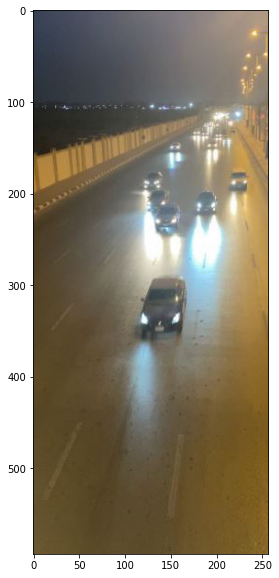

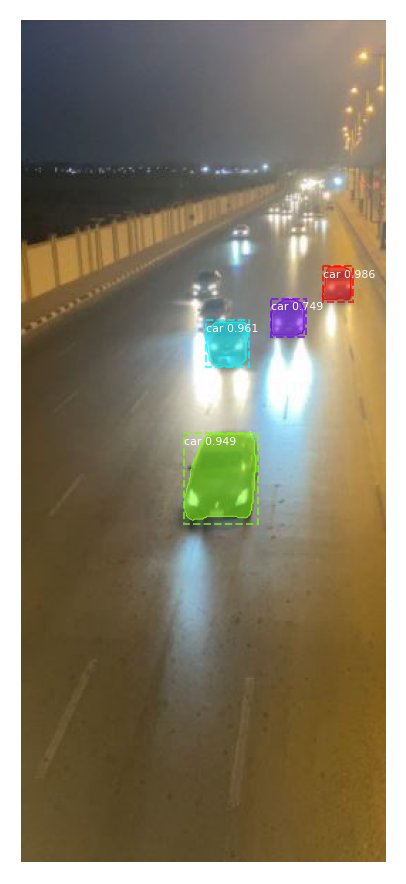

green time for the other lane is : 8
10 10
Green Traffic : 00:10
Red Traffic : 00:10
Yellow Traffic : 00:01
Green Traffic : 00:09
Red Traffic : 00:09
Green Traffic : 00:08
Red Traffic : 00:08
Green Traffic : 00:07
Red Traffic : 00:07
Green Traffic : 00:06
Red Traffic : 00:06
Green Traffic : 00:05
Red Traffic : 00:05
Green Traffic : 00:04
Red Traffic : 00:04
Green Traffic : 00:03
Red Traffic : 00:03
Green Traffic : 00:02
Red Traffic : 00:02
Green Traffic : 00:01
Red Traffic : 00:01
Yellow Traffic : 00:04
Yellow Traffic : 00:03
Yellow Traffic : 00:02
Yellow Traffic : 00:01


In [5]:

from threading import Thread
import random




#green and Red time calculation function  
def greentime_OnTurn_calc(noOfCars_lane,noOfBikes_lane,noOfBuses_lane,noOfTrucks_lane):
    
    GreenTimeLane = math.ceil(((noOfCars_lane*CarTime) + (noOfBuses_lane*BusTime) + (noOfBikes_lane*BikeTime) + (noOfTrucks_lane*TruckTime)))
    print("green time for the other lane is :", GreenTimeLane)
   
    
    if(GreenTimeLane<default_green_min):
        
            GreenTimeLane = default_green_min
            next_G = GreenTimeLane
            next_R = next_G
        
    elif(GreenTimeLane>default_green_max):
        
            GreenTimeLane = default_green_max
            next_G = GreenTimeLane
            next_R = next_G
        
    else:    
            next_G = GreenTimeLane
            next_R = next_G
        
    print(next_G , next_R)
    return next_G , next_R
        

    
    
    
    
    
#timer for the red     
def red(time_sec):
    
    while time_sec:
        mins, secs = divmod(time_sec, 60)
        timeformat = '{:02d}:{:02d}'.format(mins, secs)
     
        print("Red Traffic :" ,timeformat, end="\n")
            
       
        time.sleep(1)
        time_sec -= 1 
    Yellow(4)
        
    
    
    
  
 #timer for the green time     
def Greencountdown(time_sec):
  
    
    while time_sec:
        mins, secs = divmod(time_sec, 60)
        timeformat = '{:02d}:{:02d}'.format(mins, secs)
        print("Green Traffic :" ,timeformat, end="\n")
       
        time.sleep(0.99)
        time_sec -= 1
   
      
    

def Yellow(time_sec):
     while time_sec:
        mins, secs = divmod(time_sec, 60)
        timeformat = '{:02d}:{:02d}'.format(mins, secs)
        print("Yellow Traffic :" ,timeformat, end="\n")
       
        time.sleep(1)
        time_sec -= 1
        

    
    
    
i = 1
n = 1
flag = 0

while i <= 3:
    
    if(flag == 0):
        print("~~~~~~~~first lane turn !!!~~~~~~~~~~~")
        flag =1
    else:
        print("~~~~~~~~Second lane turn !!!~~~~~~~~~~~")
        flag =0
        
     #int to string to concate in the image    
    s = f'{n}'
    
    car_count,truck_count,bus_count,motorcycle_count ,person_count = RCNN(r'C:\Users\pc\masked_RCNN\lane'+s+'.jpg')    
    Next_Green , Next_RED = greentime_OnTurn_calc(car_count,motorcycle_count,bus_count,truck_count)
    
    if(Next_Green != 0):
    
        t = Thread(target= Greencountdown, args=(Next_Green,)).start()
        t2 = Thread(target= red, args=(Next_RED,)).start()
       
    #to itterate for the next itteration after the Red and green finish ! 
    time.sleep(Next_RED)
    n = n+1
    i = i+1
   
        
 

In [8]:

!pip install torch 
import torch
from IPython.display import Image


In [8]:
#first time only 
#!git clone https://github.com/ultralytics/yolov5
#!pip install -r requirements.txt



In [9]:

#change directory
%cd yolov5




C:\Users\pc\masked_RCNN\yolov5


In [10]:

def yolo_detection(x):
    !python detect.py --source C:\Users\pc\masked_RCNN\lane{x}.jpg --weights yolov5s.pt
    #Image(filename=r'C:\Users\pc\masked_RCNN\yolov5\yolov5\runs\detect\exp3\lane2.jpg', width=300)

In [11]:

import yaml


def yolo_output():
   
    car=0
    bus=0
    bike=0
    truck=0
    
   
    
    with open(r'C:\Users\pc\masked_RCNN\yolov5\OUTPUT.YAML') as file:
        documents = yaml.full_load(file)
    
   
 
   
    if('bus' in documents):
         bus = documents['bus']
    if('bike' in documents):
          bike = documents['motorcycle']
    if('truck' in documents):
          truck = documents['truck']  
    if('car' in documents):
        car = documents['car']
    print(documents)
               
    return  car , bus , truck , bike

In [12]:
i = 1
n = 1
flag = 0

while i <= 3:
    
    if(flag == 0):
        print("~~~~~~~~first lane turn !!!~~~~~~~~~~~")
        flag =1
    else:
        print("~~~~~~~~Second lane turn !!!~~~~~~~~~~~")
        flag =0
        
     #int to string to concate in the image    
    s = f'{n}'
    yolo_detection(i)
    car , bus , truck , bike = yolo_output()
    
    
    
    
    Next_Green , Next_RED = greentime_OnTurn_calc(car,bike,bus,truck)
    
    if(Next_Green != 0):
    
        t = Thread(target= Greencountdown, args=(Next_Green,)).start()
        t2 = Thread(target= red, args=(Next_RED,)).start()
    time.sleep(Next_RED)
    n = n+1
    i = i+1

~~~~~~~~first lane turn !!!~~~~~~~~~~~


detect: weights=['yolov5s.pt'], source=C:\Users\pc\masked_RCNN\lane1.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.1-176-gaa7a0e9 torch 1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 C:\Users\pc\masked_RCNN\lane1.jpg: 640x480 8 cars, 1 truck, Done. (0.163s)
Speed: 2.0ms pre-process, 162.7ms inference, 11.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp34


{'car': 8, 'truck': 1}
green time for the other lane is : 19
19 19
Green Traffic : 00:19
Red Traffic : 00:19
Green Traffic : 00:18
Red Traffic : 00:18
Green Traffic : 00:17
Red Traffic : 00:17
Green Traffic : 00:16
Red Traffic : 00:16
Green Traffic : 00:15
Red Traffic : 00:15
Green Traffic : 00:14
Red Traffic : 00:14
Green Traffic : 00:13
Red Traffic : 00:13
Green Traffic : 00:12
Red Traffic : 00:12
Green Traffic : 00:11
Red Traffic : 00:11
Green Traffic : 00:10
Red Traffic : 00:10
Green Traffic : 00:09
Red Traffic : 00:09
Green Traffic : 00:08
Red Traffic : 00:08
Green Traffic : 00:07
Red Traffic : 00:07
Green Traffic : 00:06
Red Traffic : 00:06
Green Traffic : 00:05
Red Traffic : 00:05
Green Traffic : 00:04
Red Traffic : 00:04
Green Traffic : 00:03
Red Traffic : 00:03
Green Traffic : 00:02
Red Traffic : 00:02
Green Traffic : 00:01
Red Traffic : 00:01
~~~~~~~~Second lane turn !!!~~~~~~~~~~~
Yellow Traffic : 00:04
Yellow Traffic : 00:03
Yellow Traffic : 00:02
Yellow Traffic : 00:01


detect: weights=['yolov5s.pt'], source=C:\Users\pc\masked_RCNN\lane2.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.1-176-gaa7a0e9 torch 1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 C:\Users\pc\masked_RCNN\lane2.jpg: 640x512 3 persons, 3 cars, Done. (0.168s)
Speed: 1.0ms pre-process, 168.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp35


{'car': 3, 'person': 3}
green time for the other lane is : 6
10 10
Green Traffic : 00:10
Red Traffic : 00:10
Green Traffic : 00:09
Red Traffic : 00:09
Green Traffic : 00:08
Red Traffic : 00:08
Green Traffic : 00:07
Red Traffic : 00:07
Green Traffic : 00:06
Red Traffic : 00:06
Green Traffic : 00:05
Red Traffic : 00:05
Green Traffic : 00:04
Red Traffic : 00:04
Green Traffic : 00:03
Red Traffic : 00:03
Green Traffic : 00:02
Red Traffic : 00:02
Green Traffic : 00:01
Red Traffic : 00:01
~~~~~~~~first lane turn !!!~~~~~~~~~~~
Yellow Traffic : 00:04
Yellow Traffic : 00:03
Yellow Traffic : 00:02
Yellow Traffic : 00:01


detect: weights=['yolov5s.pt'], source=C:\Users\pc\masked_RCNN\lane3.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.1-176-gaa7a0e9 torch 1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 C:\Users\pc\masked_RCNN\lane3.jpg: 640x288 4 cars, Done. (0.098s)
Speed: 0.0ms pre-process, 98.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp36


{'car': 4}
green time for the other lane is : 8
10 10
Green Traffic : 00:10
Red Traffic : 00:10
Green Traffic :Red Traffic : 00:09
 00:09
Red Traffic :Green Traffic : 00:08
 00:08
Green Traffic : 00:07
Red Traffic : 00:07
Green Traffic : 00:06
Red Traffic : 00:06
Green Traffic : 00:05
Red Traffic : 00:05
Green Traffic : 00:04
Red Traffic : 00:04
Green Traffic : 00:03
Red Traffic : 00:03
Green Traffic : 00:02
Red Traffic : 00:02
Green Traffic : 00:01
Red Traffic : 00:01
Yellow Traffic : 00:04
Yellow Traffic : 00:03
Yellow Traffic : 00:02
Yellow Traffic : 00:01


# Masked RCNN from video 

In [6]:
import cv2
vidcap = cv2.VideoCapture('lane.mp4')
success,image = vidcap.read()
count = 0

print(image)
while success:
  cv2.imwrite(r"C:\Users\pc\masked_RCNN\frames\frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

[[[205 198 190]
  [205 198 190]
  [205 198 190]
  ...
  [215 203 196]
  [215 203 196]
  [215 203 196]]

 [[205 198 190]
  [205 198 190]
  [205 198 190]
  ...
  [215 203 196]
  [215 203 196]
  [215 203 196]]

 [[205 198 190]
  [205 198 190]
  [205 198 190]
  ...
  [215 203 196]
  [215 203 196]
  [215 203 196]]

 ...

 [[ 65  43  31]
  [ 63  41  29]
  [ 63  41  29]
  ...
  [ 68  74  64]
  [ 79  90  84]
  [ 86  97  91]]

 [[ 65  43  31]
  [ 63  41  29]
  [ 63  41  29]
  ...
  [ 68  74  64]
  [ 77  90  84]
  [ 83  96  90]]

 [[ 65  43  31]
  [ 63  41  29]
  [ 63  41  29]
  ...
  [ 66  72  62]
  [ 76  89  83]
  [ 83  96  90]]]
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new

30
Processing 1 images
image                    shape: (848, 480, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
executed in 2.443s
car :17
bus :0
truck :0
motorcycle :0
person :0


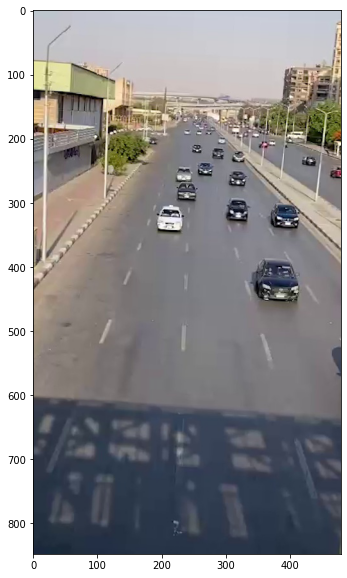

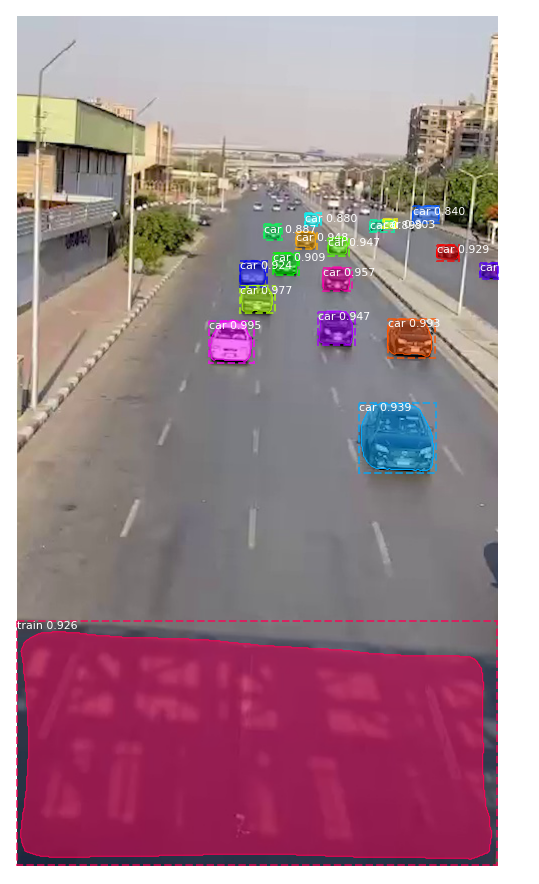

Processing 1 images
image                    shape: (848, 480, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
executed in 2.469s
car :18
bus :0
truck :0
motorcycle :0
person :0


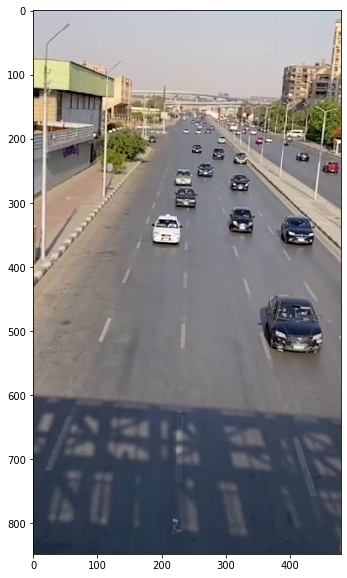

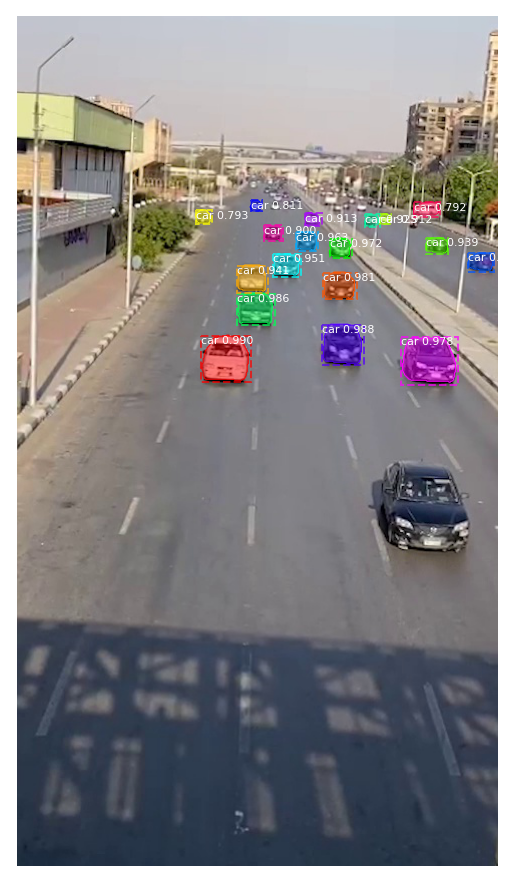

Processing 1 images
image                    shape: (848, 480, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
executed in 2.400s
car :18
bus :0
truck :0
motorcycle :0
person :1


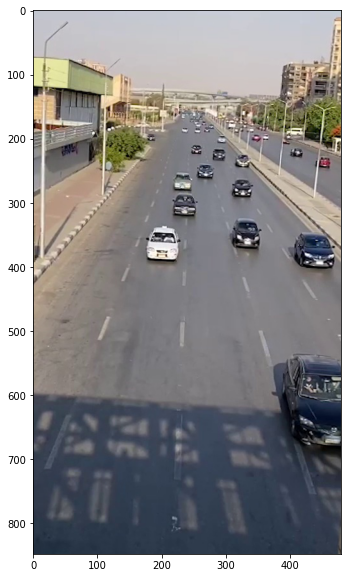

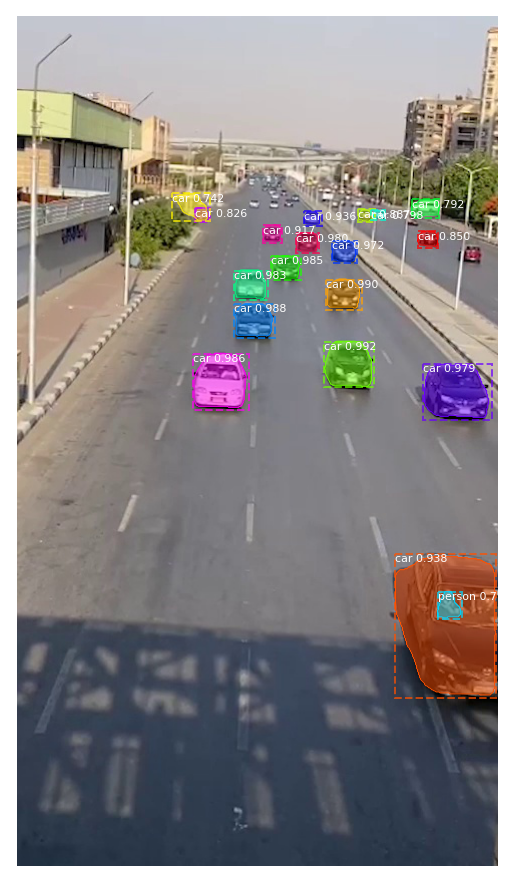

In [7]:
print(count)
for i in range (count):
    if(i%10 ==0 ):
        IMAGE_URL = r'C:\Users\pc\masked_RCNN\frames\frame'+str(i)+'.jpg'

        image_file = IMAGE_URL
        
        image = skimage.io.imread(image_file)
        plt.figure(figsize=(15, 10))
        plt.imshow(image)
        t = time.time()
        # Run detection
        results = model.detect([image], verbose=1)
        print("executed in %.3fs" % (time.time() - t))

        # Visualize results
        r = results[0]
        car_count =0
        truck_count =0
        bus_count =0
        motorcycle_count =0
        person_count=0
       
        for j in r['class_ids']:
            
            if(j==3):
                car_count+=1
            elif(j==8):
                truck_count+=1
            elif(j==6):    
                bus_count+=1
            elif(j==4):
                motorcycle_count+=1
            elif(j==1):
                person_count+=1    
                
        print("car :"+str(car_count))
        print("bus :"+str(bus_count))
        print("truck :"+str(truck_count))
        print("motorcycle :"+str(motorcycle_count))
        print("person :"+str(person_count))
        
        visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

# YOLO from video 

In [13]:
!python detect.py --source C:\Users\pc\masked_RCNN\lane.mp4 --weights yolov5s.pt

detect: weights=['yolov5s.pt'], source=C:\Users\pc\masked_RCNN\lane.mp4, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.1-176-gaa7a0e9 torch 1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
video 1/1 (1/30) C:\Users\pc\masked_RCNN\lane.mp4: 640x384 12 cars, 1 keyboard, Done. (0.116s)
video 1/1 (2/30) C:\Users\pc\masked_RCNN\lane.mp4: 640x384 13 cars, 1 keyboard, Done. (0.108s)
video 1/1 (3/30) C:\Users\pc\masked_RCNN\lane.mp4: 640x384 13 cars, 1 keyboard, Done. (0.106s)
video 1/1 (4/30) C:\Users\pc\masked_RCNN\lane.mp4: 640x384 12 cars, 1 keyboard, Done. (0.107s)
video 1/1 (5/30) C:\Users\pc\masked_RCN